/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


(24,) (24, 3) (24,)


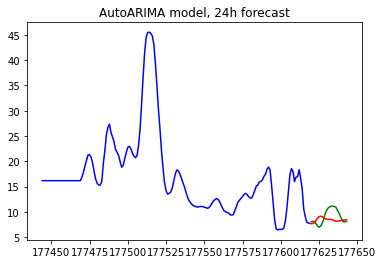

In [2]:

import sys
sys.path.insert(0, "/home/jovyan/work/src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sktime.forecasting.model_selection import temporal_train_test_split

from models import autoarima
from preprocessing.imputing import impute_simple_imputer
from preprocessing.moving_average import moving_average
from utils.sqlite_utils import get_engine, get_time_series


def graph_model_autoarima():
	ts: pd.DataFrame = get_time_series(get_engine(), "zurich", "Zch_Stampfenbachstrasse")[-1100:-900]
	ts.drop(columns=["date"], inplace=True)
	ts_imputed = impute_simple_imputer(ts, False)
	ts_smooth = moving_average(ts_imputed, False)
	y, x = autoarima.transform_data(ts_smooth, False)

	fh = 24  # TODO: determine sane fh
	y_train, y_test, x_train, x_test = temporal_train_test_split(y, x, test_size=fh)
	model = autoarima.train_model_autoarima(y_train, x_train, False)
	y_pred = model.predict(X=x_test, fh=np.linspace(1, fh, fh))

	fig, ax = plt.subplots(1)
	ax.set_title(f"AutoARIMA model, {fh}h forecast")
	ax.plot(y_train, color='blue')
	ax.plot(y_test, color='green')
	ax.plot(y_pred, color='red')
	fig.savefig("autoarima.png")

	print(y_pred.shape, x_test.shape, y_test.shape)

graph_model_autoarima()
